In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import (gradient_descent,
                   read_data,
                   mean_normalization,
                   zscore_normalization)

# Example 

In `data/houses.txt` the target value `price ($1000)` of different houses depends on the features `size (sqft)`, `bedrooms`, `floors` and `age`.

In [2]:
X_train, y_train = read_data('./data/houses.txt')

X_feature = ('size (sqft)','bedroom','floor','age')

## Plot features vs. target

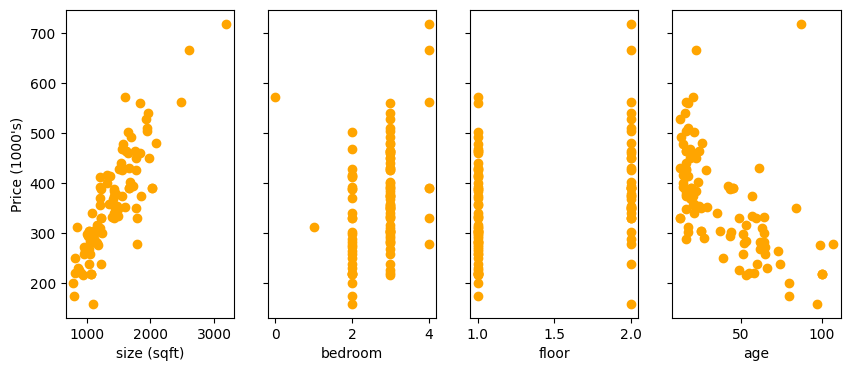

In [3]:
fig,ax = plt.subplots(1, 4, figsize=(10, 4), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train,color='orange')
    ax[i].set_xlabel(X_feature[i])

ax[0].set_ylabel("Price (1000's)")

plt.show()

## Feature Scaling

### Mean Normalization

In [4]:
X_mean,mu,xdiff = mean_normalization(X_train)

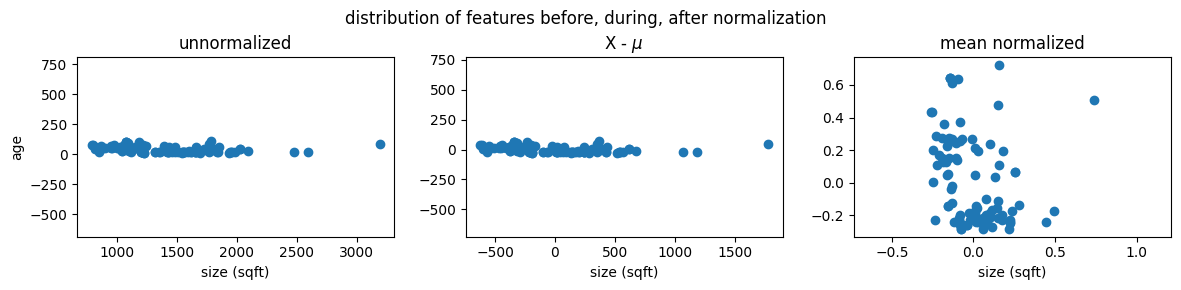

In [5]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3))

ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_feature[0]); ax[0].set_ylabel(X_feature[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter((X_train-mu)[:,0], (X_train-mu)[:,3])
ax[1].set_xlabel(X_feature[0]); ax[0].set_ylabel(X_feature[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_mean[:,0], X_mean[:,3])
ax[2].set_xlabel(X_feature[0]); ax[0].set_ylabel(X_feature[3]);
ax[2].set_title(r"mean normalized")
ax[2].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

### Z-Score Normalization

In [6]:
X_zscore,mu,sigma = zscore_normalization(X_train)

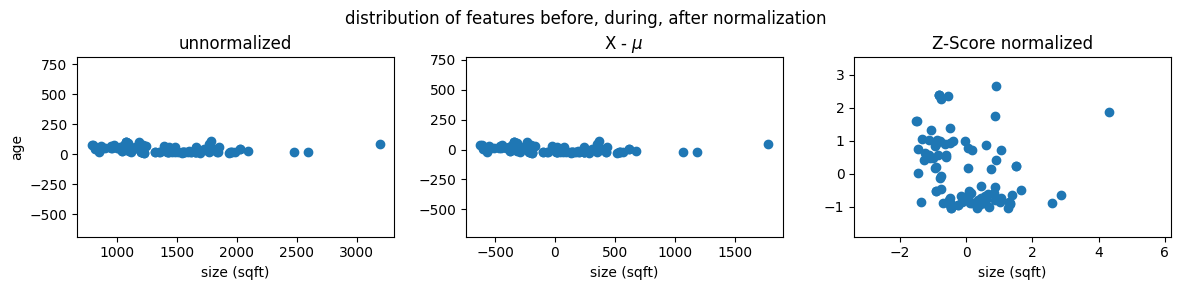

In [7]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3))

ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_feature[0]); ax[0].set_ylabel(X_feature[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter((X_train-mu)[:,0], (X_train-mu)[:,3])
ax[1].set_xlabel(X_feature[0]); ax[0].set_ylabel(X_feature[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_zscore[:,0], X_zscore[:,3])
ax[2].set_xlabel(X_feature[0]); ax[0].set_ylabel(X_feature[3]);
ax[2].set_title(r"Z-Score normalized")
ax[2].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

## Multiple Linear Regression with Mean Normalized Feature Values 

In order to predict the price of a house of an arbitrary chosen size, a linear function can be tried to fit with the given data set using the gradient descent method.

In [8]:
w,b,J_hist = gradient_descent(X_mean,y_train,np.array([0., 0., 0., 0.]),0.,4000,1.0e-1)

## Optimized Parameter Values

In [9]:
print(f'The results of the parameter values:')
print(f'w: {w}, b: {b:0.8f}')

The results of the parameter values:
w: [ 639.09996178 -126.6307044   -66.58425549 -140.01087344], b: 362.23952000


## Cost-Value vs. Iteration

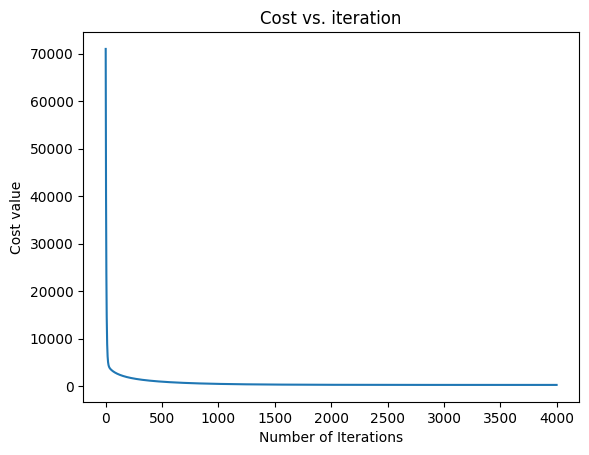

In [10]:
plt.figure()
ax = plt.axes()

ax.plot(np.arange(len(J_hist[:])),J_hist[:])

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost value')
ax.set_title("Cost vs. iteration")

plt.show()

## Results Multiple Linear Regression, Predicted Values

In [11]:
y_pred = np.zeros(X_mean.shape[0])
for i in range(X_mean.shape[0]):
    y_pred[i] = np.dot(w,X_mean[i]) + b

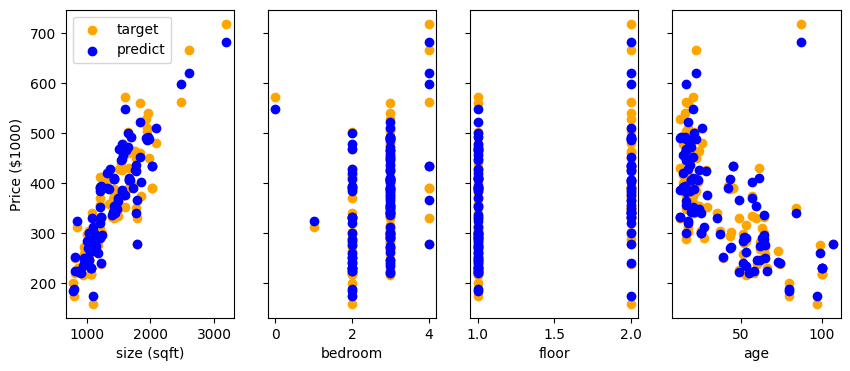

In [12]:
fig,ax=plt.subplots(1,4,figsize=(10, 4),sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train,color='orange',label = 'target')
    ax[i].set_xlabel(X_feature[i])
    ax[i].scatter(X_train[:,i],y_pred,color='blue', label = 'predict')

ax[0].set_ylabel("Price ($1000)"); ax[0].legend();

plt.show()

Let's predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.

In [13]:
X_pred = np.array([1200.,3.,1.,40])
X_pred_norm = (X_pred - mu)/xdiff

y_pred = np.dot(w,X_pred_norm) + b

print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${y_pred*1000:0.0f}")

 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $319604


## Multiple Linear Regression with Z-Score Normalized Feature Values 

In order to predict the price of a house of an arbitrary chosen size, a linear function can be tried to fit with the given data set using the gradient descent method.

In [14]:
w,b,J_hist = gradient_descent(X_zscore,y_train,np.array([0., 0., 0., 0.]),0.,3000,1.0e-1)

## Optimized Parameter Values

In [15]:
print(f'The results of the parameter values:')
print(f'w: {w}, b: {b:0.8f}')

The results of the parameter values:
w: [110.61335173 -21.47323884 -32.66070323 -37.77938362], b: 362.23952000


## Cost-Value vs. Iteration

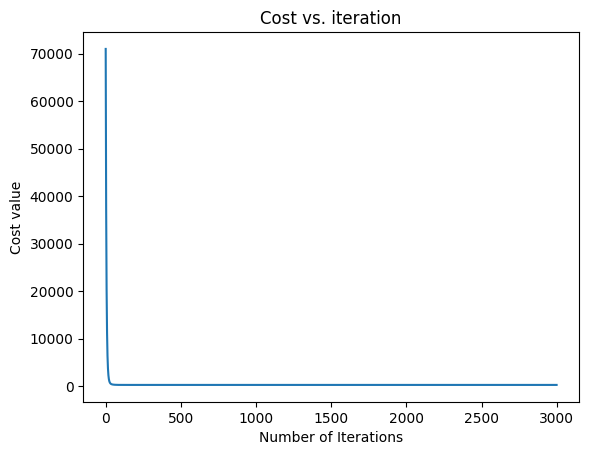

In [16]:
plt.figure()
ax = plt.axes()

ax.plot(np.arange(len(J_hist[:])),J_hist[:])

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost value')
ax.set_title("Cost vs. iteration")

plt.show()

## Results Multiple Linear Regression, Predicted Values

In [17]:
y_pred = np.zeros(X_zscore.shape[0])
for i in range(X_zscore.shape[0]):
    y_pred[i] = np.dot(w,X_zscore[i]) + b

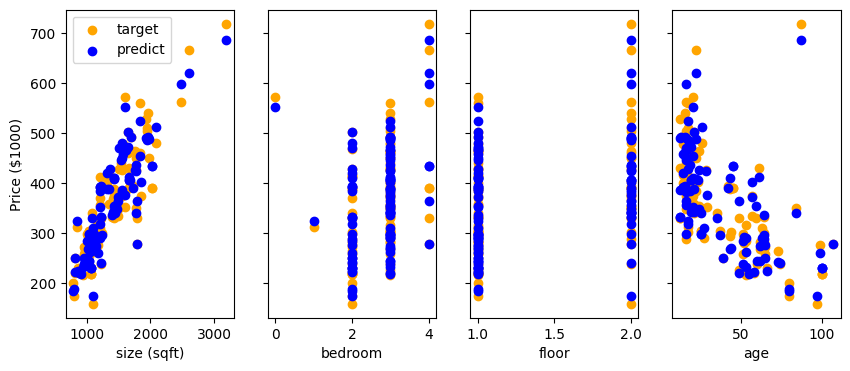

In [18]:
fig,ax=plt.subplots(1,4,figsize=(10, 4),sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train,color='orange',label = 'target')
    ax[i].set_xlabel(X_feature[i])
    ax[i].scatter(X_train[:,i],y_pred,color='blue', label = 'predict')

ax[0].set_ylabel("Price ($1000)"); ax[0].legend();

plt.show()

In [21]:
X_pred = np.array([1200.,3.,1.,40])
X_pred_norm = (X_pred - mu)/sigma

y_pred = np.dot(w,X_pred_norm) + b

print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${y_pred*1000:0.0f}")

 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318936
